In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from random import seed
from scipy import stats
import seaborn as sns
import pingouin as pg
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
import statsmodels.api as sm
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols
from statsmodels.regression import linear_model
from sklearn.metrics import explained_variance_score
%matplotlib inline

seed(888)
pd.set_option('display.max_columns', None)

# 1 Load data from "3. BrainAge"

In [31]:
# load data from pickle and convert to dataframe
brain_test = pd.read_pickle("3_brain_test.pkl")
brain_train = pd.read_pickle("3_brain_train.pkl")
main_test = pd.read_pickle("3_main_test.pkl")
main_train = pd.read_pickle("3_main_train.pkl")
brain_test = pd.DataFrame(brain_test)
brain_train = pd.DataFrame(brain_train)
main_test = pd.DataFrame(main_test)
main_train = pd.DataFrame(main_train)

# 2 Basic distributions

## 2.1 Data

In [ ]:
main_test.head()

## 2.2 Train vs. Test

In [ ]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Age', fill=True, label = "Test")
sns.kdeplot(data = main_train, x= 'Age', fill=True, label = "Train")
plt.legend()
plt.title("Train vs. Test Age")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SRMPA', fill=True, label = "Test")
sns.kdeplot(x= main_train.iloc[:,9990], fill=True, label = "Train")
plt.legend()
plt.title("Train vs. Test SR Moderate PA")
plt.show()

print("Test Gender", main_test["Gender"].value_counts())
print("Train Gender", main_train.iloc[:,22].value_counts())

## 2.3 Age and BrainAge

In [ ]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Age', hue = 'Gender', fill=True, palette = "crest")
plt.title("Age x Gender")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BADA2009', hue = 'Gender', fill=True, palette = "crest")
plt.title("BrainAge x Gender")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'Age', hue = 'Excluded', fill=True, palette = "crest")
plt.title("Age x Excluded")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BADA2009', hue = 'Excluded', fill=True, palette = "crest")
plt.title("BrainAge x Excluded")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'MPA', hue = 'Excluded', fill=True, palette = "crest")
plt.title("Moderate PA x Excluded")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BADA2009', hue = 'IS', fill=True, palette = "crest")
plt.title("BrainAge x Imaging site")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'Age', hue = 'IS', fill=True, palette = "crest")
plt.title("Age x Imaging site")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'MPA', hue = 'IS', fill=True, palette = "crest")
plt.title("Moderate PA x Imaging site")
plt.show()


plt.figure()
sns.kdeplot(data = main_test, x= 'BADA2009', fill=True, label="A2009")
sns.kdeplot(data = main_test, x= 'BADASEG', fill=True, label="ASEG")
sns.kdeplot(data = main_test, x= 'BADDesikan', fill=True, label="Desikan pial")
sns.kdeplot(data = main_test, x= 'BADAll', fill=True, label="All")
plt.title("BrainAge Segmentations")
plt.legend()
plt.show()

## 2.4 Physical activity

In [ ]:
plt.figure()
sns.kdeplot(data = main_test, x= 'LPA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'MPA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'VPA', fill=True, label = "Vigorous PA")
sns.kdeplot(data = main_test, x= 'TPA', fill=True, label = "Total PA")
plt.xlabel("Min/week of physical activity")
plt.legend()
plt.ylim(0,0.01)
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SRLPA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'SRMPA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'SRVPA', fill=True, label = "Vigorous PA")
plt.xlabel("Min/week of physical activity")
plt.title("Self Report PA distributions")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SRLPA', fill=True, label = "SR")
sns.kdeplot(data = main_test, x= 'LPA', fill=True, label = "ACC")
plt.xlabel("Min/week of physical activity")
plt.title("SR vs. Accelerometry Light PA")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SRMPA', fill=True, label = "SR")
sns.kdeplot(data = main_test, x= 'MPA', fill=True, label = "ACC")
plt.xlabel("Min/week of physical activity")
plt.title("SR vs. Accelerometry Moderate PA")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SRMPA', hue = "Gender", fill=True, label = "SR")
sns.kdeplot(data = main_test, x= 'MPA', hue = "Gender", fill=True, label = "ACC")
plt.xlabel("Min/week of physical activity")
plt.title("SR vs. Accelerometry Moderate PA")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SRVPA', fill=True, label = "SR")
sns.kdeplot(data = main_test, x= 'VPA', fill=True, label = "ACC")
plt.xlabel("Min/week of physical activity")
plt.title("SR vs. Accelerometry Vigorous PA")
plt.legend()
plt.show()

## 2.5 Fitness

In [ ]:
plt.figure()
sns.kdeplot(data = main_test, x= 'ECGW', hue = 'Gender', fill=True, palette = "crest")
plt.title("ECG max workload")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'ECGHR', hue = 'Gender', fill=True, palette = "crest")
plt.title("ECG max heart rate")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'HGR', hue = 'Gender', fill=True, palette = "crest")
plt.title("Hand grip R")
plt.show()

print("Walking speed:", main_test["WS"].value_counts())

## 2.6 Health

In [ ]:
plt.figure()
sns.kdeplot(data = main_test, x= 'HR', hue = 'Gender', fill=True, palette = "crest")
plt.title("Heart rate")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SBP', hue = 'Gender', fill=True, palette = "crest")
plt.title("Systolic BP")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'DBP', hue = 'Gender', fill=True, palette = "crest")
plt.title("Distolic BP")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BMI', hue = 'Gender', fill=True, palette = "crest")
plt.title("BMI")
plt.show()

## 2.7 Other variables

In [ ]:
print("Smoking:", main_test["Smoking"].value_counts())
print("Job PA:", main_test["JPA"].value_counts())

plt.figure()
sns.kdeplot(data = main_test, x= 'FI', hue = 'Gender', fill=True, palette = "crest")
plt.title("Fluid intelligence")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SES', hue = 'Gender', fill=True, palette = "crest")
plt.title("SES")
plt.show()

# 3 Recode variables

In [32]:
# 1 = Cheadle;  2 = Reading;  3 = Newcastle;  4 = Bristol
main_test['IS'] = main_test['IS'].map({'11025': 1, '11026': 2,'11027': 3, '11028': 4})
main_test["Smoking"] = main_test["Smoking"].map({"No":0, "Only occasionally":1, "Yes, on most or all days":2})
main_test["Gender"] = main_test["Gender"].map({"Female":0, "Male":1})
main_test["Gender"] = main_test["Gender"].astype("int")
main_test["JPA"] = main_test["JPA"].map({"Never/rarely":0, "Sometimes":1, "Usually":2,"Always":3})
main_test["WS"] = main_test["WS"].map({"Slow pace":0, "Steady average pace":1, "Brisk pace":2})

del main_test["BADDesikan"]
del main_test["BADA2009"]

main_test = main_test.rename(columns={"BADA2009": "BA"})

main_test = pd.DataFrame(main_test)


# 4 Simple correlation heatmap

Text(0.5, 1.0, 'Correlations All')

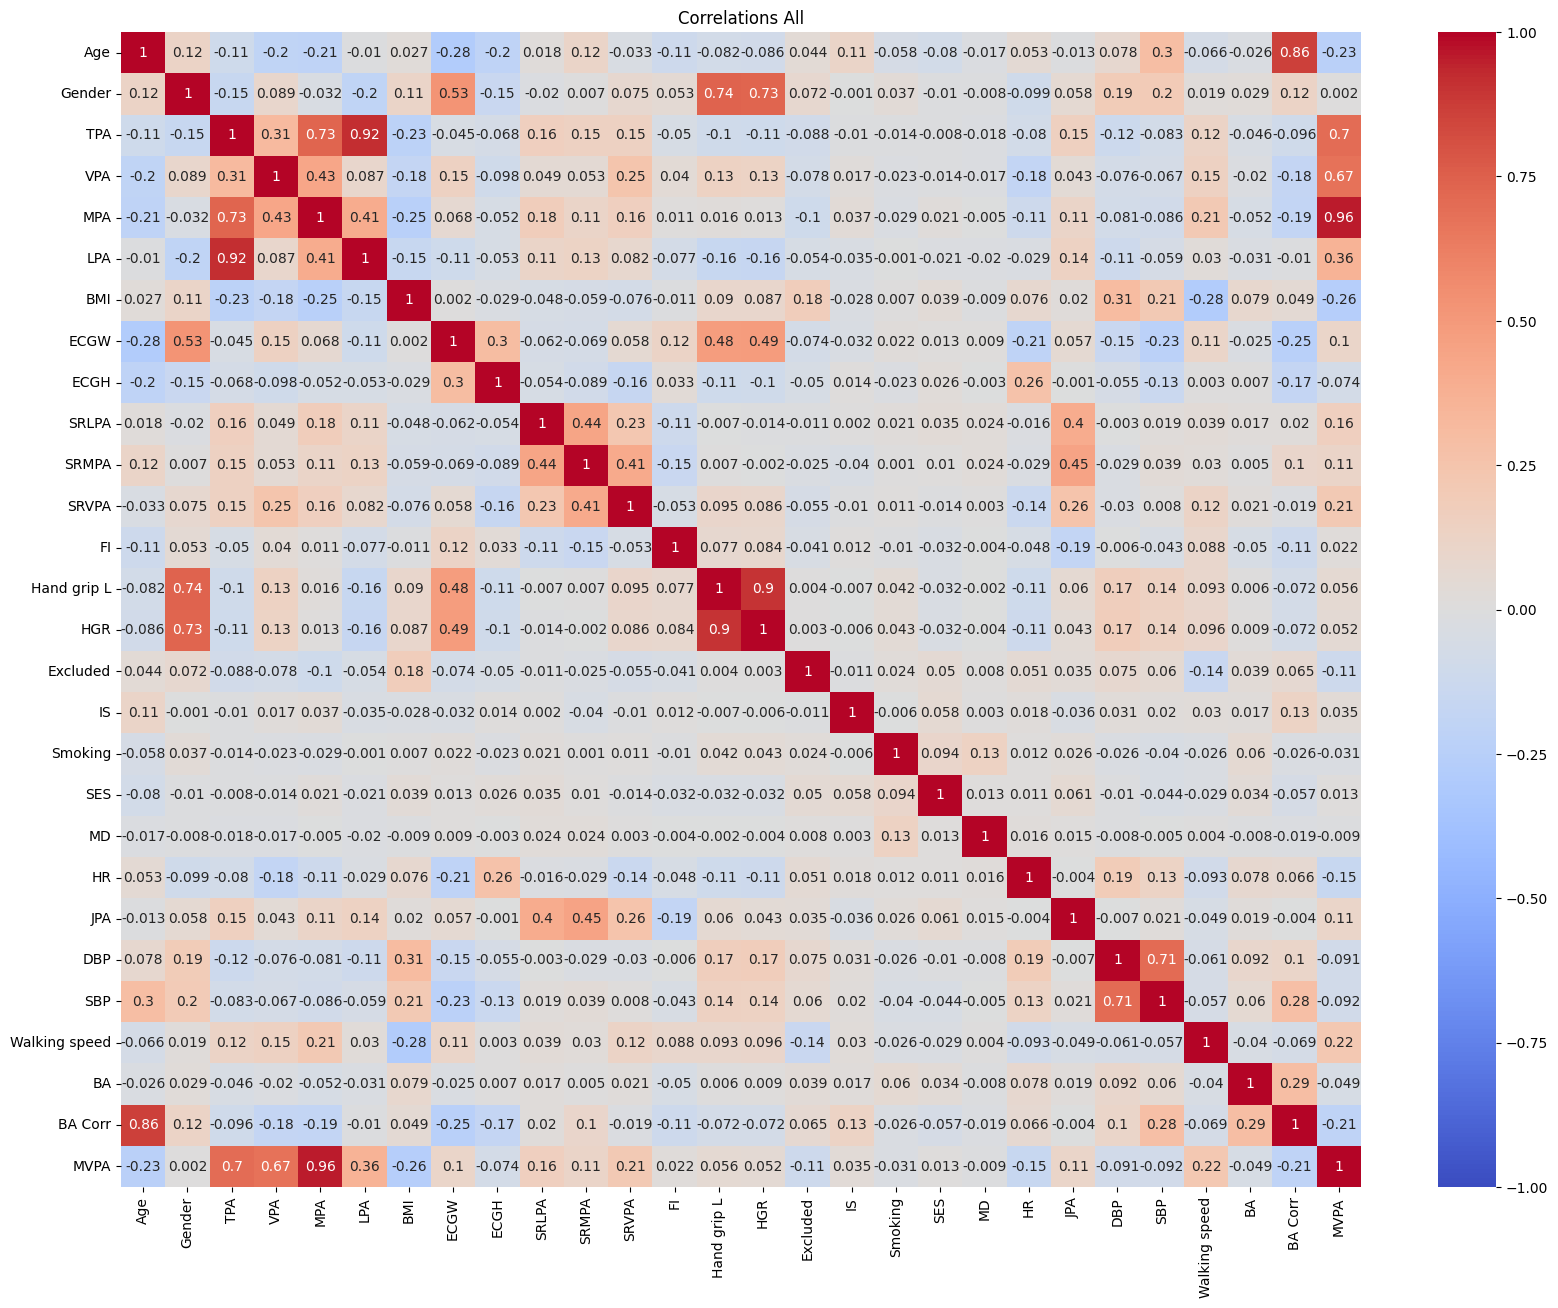

In [33]:
corr = main_test.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Correlations All")

# 5 Partial correlations with Covariates

In [37]:
cov_correlation = pg.partial_corr(data=main_test, x='SRLPA', y='BA', covar=["Gender", "IS", "Age"])
print("SR Light PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='SRMPA', y='BA', covar=["Gender", "IS", "Age"])
print("SR Moderate PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='SRVPA', y='BA', covar=["Gender", "IS", "Age"])
print("SR Vigorous PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='TPA', y='BA', covar=["Gender", "IS", "Age"])
print("Total PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='LPA', y='BA', covar=["Gender", "IS", "Age"])
print("Light PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='MPA', y='BA', covar=["Gender", "IS", "Age"])
print("Moderate PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='VPA', y='BA', covar=["Gender", "IS", "Age"])
print("Vigorous PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='MVPA', y='BA', covar=["Gender", "IS", "Age"])
print("Moderate+Vigorous PA")
print(cov_correlation)

Light PA
            n         r         CI95%     p-val
pearson  7156  0.018635  [-0.0, 0.04]  0.115042
Moderate PA
            n         r          CI95%     p-val
pearson  7156  0.009238  [-0.01, 0.03]  0.434715
Vigorous PA
            n         r          CI95%     p-val
pearson  7156  0.018059  [-0.01, 0.04]  0.126719
Total PA
            n         r           CI95%     p-val
pearson  8357 -0.044461  [-0.07, -0.02]  0.000048
Moderate+Vigorous PA
            n         r           CI95%         p-val
pearson  8357 -0.059556  [-0.08, -0.04]  5.109546e-08
Light PA
            n         r          CI95%     p-val
pearson  8357 -0.024654  [-0.05, -0.0]  0.024237
Moderate PA
            n         r           CI95%         p-val
pearson  8357 -0.060284  [-0.08, -0.04]  3.503757e-08
Vigorous PA
            n         r           CI95%     p-val
pearson  8357 -0.030592  [-0.05, -0.01]  0.005169


# 6 Models OLS

## 6.1 Covariates

In [38]:
cov_model = ols('BA ~ Gender + Age + IS + Gender:Age + Gender:IS + Age:IS', missing='drop', data = main_test).fit()
print(cov_model.summary())

#calculate effect size
results = cov_model
coefficients = results.params
t_stats = results.tvalues
effect_size = coefficients / t_stats
print(effect_size)

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.054
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.66e-07
Time:                        14:11:02   Log-Likelihood:                -28267.
No. Observations:                8357   AIC:                         5.655e+04
Df Residuals:                    8350   BIC:                         5.660e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8470      1.551      3.769      0.0

## 6.2 Accelerometer PA

In [39]:
pa_model = ols('BA ~ LPA + MPA + VPA + Gender + Age + IS + Gender:Age + Gender:IS + Age:IS', missing='drop', data = main_test).fit()
print(pa_model.summary())

#calculate effect size
results = pa_model
coefficients = results.params
t_stats = results.tvalues
effect_size = coefficients / t_stats
print(effect_size)

(8357, 28)
                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.114
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           4.41e-12
Time:                        14:11:02   Log-Likelihood:                -11822.
No. Observations:                8357   AIC:                         2.366e+04
Df Residuals:                    8347   BIC:                         2.373e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0298      0.033     -0.9

## 6.3 Self-report PA

In [ ]:
sr_model = ols('BA ~ SRLPA + SRMPA + SRVPA +Gender + Age + IS + Gender:Age + Gender:IS + Age:IS', missing='drop', data = main_test).fit()
print(sr_model.summary())

#calculate effect size
results = sr_model
coefficients = results.params
t_stats = results.tvalues
effect_size = coefficients / t_stats
print(effect_size)

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.660
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           3.51e-06
Time:                        14:11:03   Log-Likelihood:                -10129.
No. Observations:                7156   AIC:                         2.028e+04
Df Residuals:                    7146   BIC:                         2.035e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0408      0.036     -1.141      0.2

## 6.4 Accelerometer + Self-report PA

In [40]:
main_test["SRMPA"] = stats.zscore(main_test['SRMPA'], nan_policy='omit')
main_test["SRVPA"] = stats.zscore(main_test['SRVPA'], nan_policy='omit')
main_test["SRLPA"] = stats.zscore(main_test['SRLPA'], nan_policy='omit')
sr_pa_model = ols('BA ~ SRLPA + SRMPA + SRVPA +LPA + MPA + VPA+ Gender + Age + IS + Gender:Age + Gender:IS + Age:IS', missing='drop', data = main_test).fit()
print(sr_pa_model.summary())
results = sr_pa_model
coefficients = results.params
t_stats = results.tvalues

#calculate effect size
effect_size = coefficients / t_stats
print(effect_size)

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.832
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           3.66e-10
Time:                        14:11:02   Log-Likelihood:                -10115.
No. Observations:                7156   AIC:                         2.026e+04
Df Residuals:                    7143   BIC:                         2.035e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0450      0.036     -1.255      0.2

# 7 Model comparisons

# 7.1 Cov x PA

In [42]:
model_comparison = anova_lm(cov_model, pa_model)
print(model_comparison)

   df_resid            ssr  df_diff        ss_diff              F  Pr(>F)
0    8350.0  424155.388689      0.0            NaN            NaN     NaN
1    8347.0    8284.518920      3.0  415870.869769  139669.109876     0.0


In [43]:
model_comparison = anova_lm(cov_model, sr_model)
print(model_comparison)

   df_resid            ssr  df_diff        ss_diff           F  Pr(>F)
0    8350.0  424155.388689      0.0            NaN         NaN     NaN
1    7146.0    7106.093135   1204.0  417049.295554  348.331718     0.0


## Cov x PA x SR

In [44]:
model_comparison = anova_lm(pa_model, sr_pa_model)
print(model_comparison)

   df_resid         ssr  df_diff      ss_diff         F    Pr(>F)
0    8347.0  8284.51892      0.0          NaN       NaN       NaN
1    7143.0  7078.44945   1204.0  1206.069471  1.010854  0.399065


In [45]:
model_comparison = anova_lm(sr_model, sr_pa_model)
print(model_comparison)

   df_resid          ssr  df_diff    ss_diff         F    Pr(>F)
0    7146.0  7106.093135      0.0        NaN       NaN       NaN
1    7143.0  7078.449450      3.0  27.643685  9.298592  0.000004


# Model Health and Fitness

In [46]:
results = ols('BA ~ HGR + SBP + HR + DBP + Age + Gender + IS+ Gender:Age + Gender:IS + Age:IS', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.41
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.22e-19
Time:                        14:11:06   Log-Likelihood:                -9295.2
No. Observations:                6579   AIC:                         1.861e+04
Df Residuals:                    6568   BIC:                         1.869e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9292      0.129     -7.223      0.0

In [47]:
results = ols('BA ~ HGR + HR + DBP + FI + MPA + Age + IS', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     10.14
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.17e-12
Time:                        14:11:06   Log-Likelihood:                -6630.3
No. Observations:                4680   AIC:                         1.328e+04
Df Residuals:                    4672   BIC:                         1.333e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6664      0.148     -4.513      0.0

In [48]:
results = ols('BA ~ MPA + Age + IS + Gender + Gender:Age + Gender:IS + IS:Age', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.39
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           4.71e-13
Time:                        14:11:07   Log-Likelihood:                -11822.
No. Observations:                8357   AIC:                         2.366e+04
Df Residuals:                    8349   BIC:                         2.372e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0284      0.032     -0.878      0.3

In [49]:
results = ols('BA ~ MPA + DBP + Age + SES + Smoking +  HR + Excluded + IS + Gender + Gender:Age + Gender:IS + IS:Age', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     12.87
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.58e-26
Time:                        14:11:07   Log-Likelihood:                -9294.8
No. Observations:                6592   AIC:                         1.862e+04
Df Residuals:                    6579   BIC:                         1.870e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9555      0.117     -8.173      0.0

In [50]:
results = ols('BA ~ MPA', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     23.04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.62e-06
Time:                        14:11:07   Log-Likelihood:                -11847.
No. Observations:                8357   AIC:                         2.370e+04
Df Residuals:                    8355   BIC:                         2.371e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.188e-18      0.011  -1.09e-16      1.0

# Moderation analysis Acc PA and Fitness / Health

In [51]:
#regression of x on m
model1 = ols('BMI ~ MPA', data = main_test).fit()
#regression of y on m
model2 = ols('BA ~ BMI',data = main_test).fit()
#regression of y on x
model3 = ols('BA ~ MPA', data = main_test).fit()
#calculate the indirect effect
indirect_effect = model1.params['MPA'] * model2.params['BMI']
#calculate the total effect
total_effect = model3.params['MPA']
#calculate the direct effect
direct_effect = total_effect - indirect_effect
#print the results
print('Indirect effect: '+str(indirect_effect))
print('Direct effect: '+str(direct_effect))
print('Total effect: '+str(total_effect))

Indirect effect: -0.019728912963886614
Direct effect: -0.03270759640916597
Total effect: -0.05243650937305258


In [52]:
#regression of x on m
model1 = ols('DBP ~ MPA', data = main_test).fit()
#regression of y on m
model2 = ols('BA ~ DBP',data = main_test).fit()
#regression of y on x
model3 = ols('BA ~ MPA', data = main_test).fit()
#calculate the indirect effect
indirect_effect = model1.params['MPA'] * model2.params['DBP']
#calculate the total effect
total_effect = model3.params['MPA']
#calculate the direct effect
direct_effect = total_effect - indirect_effect
#print the results
print('Indirect effect: '+str(indirect_effect))
print('Direct effect: '+str(direct_effect))
print('Total effect: '+str(total_effect))

Indirect effect: -0.007439092758388978
Direct effect: -0.0449974166146636
Total effect: -0.05243650937305258


In [53]:
#regression of x on m
model1 = ols('HR ~ MPA', data = main_test).fit()
#regression of y on m
model2 = ols('BA ~ HR',data = main_test).fit()
#regression of y on x
model3 = ols('BA ~ MPA', data = main_test).fit()
#calculate the indirect effect
indirect_effect = model1.params['MPA'] * model2.params['HR']
#calculate the total effect
total_effect = model3.params['MPA']
#calculate the direct effect
direct_effect = total_effect - indirect_effect
#print the results
print('Indirect effect: '+str(indirect_effect))
print('Direct effect: '+str(direct_effect))
print('Total effect: '+str(total_effect))

Indirect effect: -0.00852220739848652
Direct effect: -0.04391430197456606
Total effect: -0.05243650937305258


# Mediation analysis Self-report - Job PA - Fluid intelligence

In [54]:
#regression of x on m
model1 = ols('FI ~ SRMPA', data = main_test).fit()
#regression of y on m
model2 = ols('BA ~ FI',data = main_test).fit()
#regression of y on x
model3 = ols('BA ~ SRMPA', data = main_test).fit()
#calculate the indirect effect
indirect_effect = model1.params['SRMPA'] * model2.params['FI']
#calculate the total effect
total_effect = model3.params['SRMPA']
#calculate the direct effect
direct_effect = total_effect - indirect_effect
#print the results
print('Indirect effect: '+str(indirect_effect))
print('Direct effect: '+str(direct_effect))
print('Total effect: '+str(total_effect))

Indirect effect: 0.007450885014156709
Direct effect: -0.0028713553939755014
Total effect: 0.004579529620181207


In [55]:
#regression of x on m
model1 = ols('FI ~ SRVPA', data = main_test).fit()
#regression of y on m
model2 = ols('BA ~ FI',data = main_test).fit()
#regression of y on x
model3 = ols('BA ~ SRVPA', data = main_test).fit()
#calculate the indirect effect
indirect_effect = model1.params['SRVPA'] * model2.params['FI']
#calculate the total effect
total_effect = model3.params['SRVPA']
#calculate the direct effect
direct_effect = total_effect - indirect_effect
#print the results
print('Indirect effect: '+str(indirect_effect))
print('Direct effect: '+str(direct_effect))
print('Total effect: '+str(total_effect))

Indirect effect: 0.0027015075375662824
Direct effect: 0.018465476427408492
Total effect: 0.021166983964974774


In [56]:
#regression of x on m
model1 = ols('FI ~ JPA', data = main_test).fit()
#regression of y on m
model2 = ols('BA ~ FI',data = main_test).fit()
#regression of y on x
model3 = ols('BA ~ JPA', data = main_test).fit()
#calculate the indirect effect
indirect_effect = model1.params['JPA'] * model2.params['FI']
#calculate the total effect
total_effect = model3.params['JPA']
#calculate the direct effect
direct_effect = total_effect - indirect_effect
#print the results
print('Indirect effect: '+str(indirect_effect))
print('Direct effect: '+str(direct_effect))
print('Total effect: '+str(total_effect))

Indirect effect: 0.013058836047159468
Direct effect: 0.012178386857147026
Total effect: 0.025237222904306494


To Do for Scripts

- Clean up Brain Age and Preprocessing script
- Make one Preprocessing & BrainAge script (only with important segmentations) for validation set
- One final analysis script with seperate section for exploration and validation data and one section comparing the two and doing boxplot together